In [8]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# # get all csv file paths from data folder
# csv_files = glob.glob("data/CGMacros-*.csv")  

# # columns we want to keep
# selected_columns = ["Timestamp", "Libre GL", "Dexcom GL", "HR", "Calories", "Meal Type", "Carbs", "Protein", "Fat", "Fiber"]


# # list storing data frames per participant
# data_list = []

# for file in csv_files:
#     df = pd.read_csv(file)
#     df["subject"] = int(file.split("-")[-1].split(".")[0]) 
#     df = df[["subject"] + selected_columns]
#     data_list.append(df)  

# merged_df = pd.concat(data_list, ignore_index=True)

In [ ]:
# # keep this commented out because we already have the all_data.csv
# merged_df.to_csv("all_data.csv", index=False)

In [12]:
df = pd.read_csv('all_data.csv')

In [13]:
df

,subject,Timestamp,Libre GL,Dexcom GL,HR,Calories,Meal Type,Carbs,Protein,Fat,Fiber
0,1,2020-05-01 10:30:00,84.000000,NaN,56.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020-05-01 10:31:00,84.133333,NaN,56.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-05-01 10:32:00,84.266667,NaN,57.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-05-01 10:33:00,84.400000,NaN,54.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2020-05-01 10:34:00,84.533333,NaN,55.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
687575,49,2025-05-22 00:03:00,262.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687576,49,2025-05-22 00:04:00,261.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687577,49,2025-05-22 00:05:00,261.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
687578,49,2025-05-22 00:06:00,260.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
bio_df = pd.read_csv('bio.csv')

In [15]:
# only keeping columns we want from bio.csv
bio_df = bio_df[["subject", "A1c PDL (Lab)"]].rename(columns={"A1c PDL (Lab)": "HbA1c"})

# merge df with bio_df
merged_data = df.merge(bio_df, on="subject", how="left")


# classify participants into Diabetes status groups
def classify_diabetes(hba1c):
    if hba1c < 5.7:
        return "No Diabetes"
    elif 5.7 <= hba1c <= 6.4:
        return "Pre-Diabetes"
    else:
        return "Type 2 Diabetes"


merged_data["Diabetes Status"] = merged_data["HbA1c"].apply(classify_diabetes)


def clean_meal_type(meal):
    if isinstance(meal, str):  
        meal = meal.lower()  
        if "snack" in meal:  
            return "Snack"
        elif "breakfast" in meal:
            return "Breakfast"
        elif "lunch" in meal:
            return "Lunch"
        elif "dinner" in meal:
            return "Dinner"
    return meal 

merged_data["Meal Type"] = merged_data["Meal Type"].apply(clean_meal_type)

merged_data["Timestamp"] = pd.to_datetime(merged_data["Timestamp"])


# split into separate dataframes
no_diabetes_df = merged_data[merged_data["Diabetes Status"] == "No Diabetes"]
pre_diabetes_df = merged_data[merged_data["Diabetes Status"] == "Pre-Diabetes"]
t2d_df = merged_data[merged_data["Diabetes Status"] == "Type 2 Diabetes"]



In [16]:
merged_data

,subject,Timestamp,Libre GL,Dexcom GL,HR,Calories,Meal Type,Carbs,Protein,Fat,Fiber,HbA1c,Diabetes Status
0,1,2020-05-01 10:30:00,84.000000,NaN,56.0,NaN,NaN,NaN,NaN,NaN,NaN,5.4,No Diabetes
1,1,2020-05-01 10:31:00,84.133333,NaN,56.0,NaN,NaN,NaN,NaN,NaN,NaN,5.4,No Diabetes
2,1,2020-05-01 10:32:00,84.266667,NaN,57.0,NaN,NaN,NaN,NaN,NaN,NaN,5.4,No Diabetes
3,1,2020-05-01 10:33:00,84.400000,NaN,54.0,NaN,NaN,NaN,NaN,NaN,NaN,5.4,No Diabetes
4,1,2020-05-01 10:34:00,84.533333,NaN,55.0,NaN,NaN,NaN,NaN,NaN,NaN,5.4,No Diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
687575,49,2025-05-22 00:03:00,262.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.2,Type 2 Diabetes
687576,49,2025-05-22 00:04:00,261.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.2,Type 2 Diabetes
687577,49,2025-05-22 00:05:00,261.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.2,Type 2 Diabetes
687578,49,2025-05-22 00:06:00,260.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.2,Type 2 Diabetes


In [17]:
# Checking if there is macro data (Carbs, Protein, Fat) when 'Meal Type' is missing
missing_meal_macros = merged_data[merged_data["Meal Type"].isna() & (merged_data[["Carbs", "Protein", "Fat"]].notna().any(axis=1))]

# Display rows
print(missing_meal_macros)


Empty DataFrame
Columns: [subject, Timestamp, Libre GL, Dexcom GL, HR, Calories, Meal Type, Carbs, Protein, Fat, Fiber, HbA1c, Diabetes Status]
Index: []


In [18]:
merged_data.columns

Index(['subject', 'Timestamp', 'Libre GL', 'Dexcom GL', 'HR', 'Calories',
       'Meal Type', 'Carbs', 'Protein', 'Fat', 'Fiber', 'HbA1c',
       'Diabetes Status'],
      dtype='object')

In [19]:
# merged_data.to_csv('yuh.csv')

In [20]:
merged_data['subject'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [21]:
gut_health_df = pd.read_csv('gut_health_test.csv')

In [22]:
gut_health_df.columns

Index(['subject', 'Gut Lining Health', 'LPS Biosynthesis Pathways',
       'Biofilm, Chemotaxis, and Virulence Pathways',
       'TMA Production Pathways', 'Ammonia Production Pathways',
       'Metabolic Fitness', 'Active Microbial Diversity',
       'Butyrate Production Pathways', 'Flagellar Assembly Pathways',
       'Putrescine Production Pathways', 'Uric Acid Production Pathways',
       'Bile Acid Metabolism Pathways', 'Inflammatory Activity',
       'Gut Microbiome Health', 'Digestive Efficiency', 'Protein Fermentation',
       'Gas Production', 'Methane Gas Production Pathways',
       'Sulfide Gas Production Pathways', 'Oxalate Metabolism Pathways',
       'Salt Stress Pathways', 'Microbiome-Induced Stress'],
      dtype='object')

In [23]:
gut_health_shorter = gut_health_df[['subject', 'Gut Lining Health']]


In [24]:
# gut_health_shorter

In [25]:
wee = merged_data.merge(gut_health_shorter, on = 'subject', how = 'left')

In [26]:
wee

,subject,Timestamp,Libre GL,Dexcom GL,HR,Calories,Meal Type,Carbs,Protein,Fat,Fiber,HbA1c,Diabetes Status,Gut Lining Health
0,1,2020-05-01 10:30:00,84.000000,NaN,56.0,NaN,NaN,NaN,NaN,NaN,NaN,5.4,No Diabetes,2.0
1,1,2020-05-01 10:31:00,84.133333,NaN,56.0,NaN,NaN,NaN,NaN,NaN,NaN,5.4,No Diabetes,2.0
2,1,2020-05-01 10:32:00,84.266667,NaN,57.0,NaN,NaN,NaN,NaN,NaN,NaN,5.4,No Diabetes,2.0
3,1,2020-05-01 10:33:00,84.400000,NaN,54.0,NaN,NaN,NaN,NaN,NaN,NaN,5.4,No Diabetes,2.0
4,1,2020-05-01 10:34:00,84.533333,NaN,55.0,NaN,NaN,NaN,NaN,NaN,NaN,5.4,No Diabetes,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687575,49,2025-05-22 00:03:00,262.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.2,Type 2 Diabetes,1.0
687576,49,2025-05-22 00:04:00,261.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.2,Type 2 Diabetes,1.0
687577,49,2025-05-22 00:05:00,261.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.2,Type 2 Diabetes,1.0
687578,49,2025-05-22 00:06:00,260.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.2,Type 2 Diabetes,1.0


In [27]:
wee = wee.dropna(subset=['Gut Lining Health'])

In [28]:
wee['subject'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 27, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39,
       41, 42, 43, 44, 45, 46, 47, 49])

In [29]:
wee.columns

Index(['subject', 'Timestamp', 'Libre GL', 'Dexcom GL', 'HR', 'Calories',
       'Meal Type', 'Carbs', 'Protein', 'Fat', 'Fiber', 'HbA1c',
       'Diabetes Status', 'Gut Lining Health'],
      dtype='object')

In [30]:
# Count occurrences of each Gut Lining Health per Diabetes Status
gut_health_counts = wee.groupby("Diabetes Status")["Gut Lining Health"].value_counts().unstack()

# Display the table
print(gut_health_counts)


Gut Lining Health     1.0     2.0    3.0
Diabetes Status                         
No Diabetes        104920   75195  30660
Pre-Diabetes        64455  111645  48510
Type 2 Diabetes     60930   78180  60690


In [31]:
# wee

In [32]:
meal_df = wee.dropna(subset=['Meal Type'])


In [33]:
# meal_df.to_csv('meals.csv')

In [34]:
meal_df

,subject,Timestamp,Libre GL,Dexcom GL,HR,Calories,Meal Type,Carbs,Protein,Fat,Fiber,HbA1c,Diabetes Status,Gut Lining Health
233,1,2020-05-01 14:23:00,69.800000,109.4,95.0,1170.0,Lunch,85.0,88.0,54.2,12.0,5.4,No Diabetes,2.0
618,1,2020-05-01 20:48:00,84.800000,114.8,81.0,80.0,Dinner,18.0,0.0,0.0,0.0,5.4,No Diabetes,2.0
825,1,2020-05-02 00:15:00,81.000000,97.4,78.0,110.0,Snack,24.0,0.0,2.0,0.0,5.4,No Diabetes,2.0
1308,1,2020-05-02 08:18:00,88.400000,101.8,81.0,448.0,Breakfast,66.0,22.0,10.5,0.0,5.4,No Diabetes,2.0
1530,1,2020-05-02 12:00:00,82.000000,80.0,84.0,840.0,Lunch,89.0,17.0,42.0,3.0,5.4,No Diabetes,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684069,49,2025-05-19 13:37:00,82.933333,94.8,93.0,445.0,Lunch,43.0,20.0,20.0,13.0,7.2,Type 2 Diabetes,1.0
684473,49,2025-05-19 20:21:00,88.466667,106.0,78.0,370.0,Dinner,38.0,26.0,12.0,2.0,7.2,Type 2 Diabetes,1.0
685118,49,2025-05-20 07:06:00,138.333333,152.6,81.0,268.0,Breakfast,24.0,22.0,10.5,0.0,7.2,Type 2 Diabetes,1.0
685465,49,2025-05-20 12:53:00,84.000000,100.0,84.0,725.0,Lunch,94.0,44.0,20.0,4.0,7.2,Type 2 Diabetes,1.0


In [35]:
meal_df['Carbs']

233       85.0
618       18.0
825       24.0
1308      66.0
1530      89.0
          ... 
684069    43.0
684473    38.0
685118    24.0
685465    94.0
686614    73.0
Name: Carbs, Length: 1600, dtype: float64

In [36]:
wee = wee.copy()
wee['Carb Category'] = pd.cut(wee['Carbs'], bins=[0, 30, 75, 176], labels=['Low', 'Moderate', 'High'], right=False)
# 0 - 30 grams is low carb
# 30-75 grams is moderate carb
# 75 - 176 grams is high carb

In [37]:
wee

,subject,Timestamp,Libre GL,Dexcom GL,HR,Calories,Meal Type,Carbs,Protein,Fat,Fiber,HbA1c,Diabetes Status,Gut Lining Health,Carb Category
0,1,2020-05-01 10:30:00,84.000000,NaN,56.0,NaN,NaN,NaN,NaN,NaN,NaN,5.4,No Diabetes,2.0,NaN
1,1,2020-05-01 10:31:00,84.133333,NaN,56.0,NaN,NaN,NaN,NaN,NaN,NaN,5.4,No Diabetes,2.0,NaN
2,1,2020-05-01 10:32:00,84.266667,NaN,57.0,NaN,NaN,NaN,NaN,NaN,NaN,5.4,No Diabetes,2.0,NaN
3,1,2020-05-01 10:33:00,84.400000,NaN,54.0,NaN,NaN,NaN,NaN,NaN,NaN,5.4,No Diabetes,2.0,NaN
4,1,2020-05-01 10:34:00,84.533333,NaN,55.0,NaN,NaN,NaN,NaN,NaN,NaN,5.4,No Diabetes,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687575,49,2025-05-22 00:03:00,262.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.2,Type 2 Diabetes,1.0,NaN
687576,49,2025-05-22 00:04:00,261.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.2,Type 2 Diabetes,1.0,NaN
687577,49,2025-05-22 00:05:00,261.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.2,Type 2 Diabetes,1.0,NaN
687578,49,2025-05-22 00:06:00,260.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.2,Type 2 Diabetes,1.0,NaN


In [38]:
better_meal_df = wee.dropna(subset=['Meal Type'])

In [39]:
better_meal_df

,subject,Timestamp,Libre GL,Dexcom GL,HR,Calories,Meal Type,Carbs,Protein,Fat,Fiber,HbA1c,Diabetes Status,Gut Lining Health,Carb Category
233,1,2020-05-01 14:23:00,69.800000,109.4,95.0,1170.0,Lunch,85.0,88.0,54.2,12.0,5.4,No Diabetes,2.0,High
618,1,2020-05-01 20:48:00,84.800000,114.8,81.0,80.0,Dinner,18.0,0.0,0.0,0.0,5.4,No Diabetes,2.0,Low
825,1,2020-05-02 00:15:00,81.000000,97.4,78.0,110.0,Snack,24.0,0.0,2.0,0.0,5.4,No Diabetes,2.0,Low
1308,1,2020-05-02 08:18:00,88.400000,101.8,81.0,448.0,Breakfast,66.0,22.0,10.5,0.0,5.4,No Diabetes,2.0,Moderate
1530,1,2020-05-02 12:00:00,82.000000,80.0,84.0,840.0,Lunch,89.0,17.0,42.0,3.0,5.4,No Diabetes,2.0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684069,49,2025-05-19 13:37:00,82.933333,94.8,93.0,445.0,Lunch,43.0,20.0,20.0,13.0,7.2,Type 2 Diabetes,1.0,Moderate
684473,49,2025-05-19 20:21:00,88.466667,106.0,78.0,370.0,Dinner,38.0,26.0,12.0,2.0,7.2,Type 2 Diabetes,1.0,Moderate
685118,49,2025-05-20 07:06:00,138.333333,152.6,81.0,268.0,Breakfast,24.0,22.0,10.5,0.0,7.2,Type 2 Diabetes,1.0,Low
685465,49,2025-05-20 12:53:00,84.000000,100.0,84.0,725.0,Lunch,94.0,44.0,20.0,4.0,7.2,Type 2 Diabetes,1.0,High


In [40]:
better_meal_df['Meal Type'].unique()

array(['Lunch', 'Dinner', 'Snack', 'Breakfast'], dtype=object)

In [41]:
better_meal_df['Gut Lining Health'].unique()

array([2., 1., 3.])

In [42]:
better_meal_df['Carb Category'].unique()

['High', 'Low', 'Moderate', NaN]
Categories (3, object): ['Low' < 'Moderate' < 'High']

In [43]:
grouped = better_meal_df.groupby(["Diabetes Status", "Gut Lining Health", "Meal Type", "Carb Category"]).size().unstack(fill_value=0)
print(grouped)


Carb Category                                Low  Moderate  High
Diabetes Status Gut Lining Health Meal Type                     
No Diabetes     1.0               Breakfast   14        55     0
                                  Dinner      36        40    21
                                  Lunch       14        14    41
                                  Snack       35        16     5
                2.0               Breakfast   10        40     0
                                  Dinner      30        20    10
                                  Lunch       10        10    29
                                  Snack       49        16     3
                3.0               Breakfast    4        15     0
                                  Dinner       7         3     3
                                  Lunch        4         4    11
                                  Snack       15         4     2
Pre-Diabetes    1.0               Breakfast    8        32     0
                         

C:\Users\YooNi\AppData\Local\Temp\ipykernel_50572\1517750198.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = better_meal_df.groupby(["Diabetes Status", "Gut Lining Health", "Meal Type", "Carb Category"]).size().unstack(fill_value=0)


In [44]:
wee

,subject,Timestamp,Libre GL,Dexcom GL,HR,Calories,Meal Type,Carbs,Protein,Fat,Fiber,HbA1c,Diabetes Status,Gut Lining Health,Carb Category
0,1,2020-05-01 10:30:00,84.000000,NaN,56.0,NaN,NaN,NaN,NaN,NaN,NaN,5.4,No Diabetes,2.0,NaN
1,1,2020-05-01 10:31:00,84.133333,NaN,56.0,NaN,NaN,NaN,NaN,NaN,NaN,5.4,No Diabetes,2.0,NaN
2,1,2020-05-01 10:32:00,84.266667,NaN,57.0,NaN,NaN,NaN,NaN,NaN,NaN,5.4,No Diabetes,2.0,NaN
3,1,2020-05-01 10:33:00,84.400000,NaN,54.0,NaN,NaN,NaN,NaN,NaN,NaN,5.4,No Diabetes,2.0,NaN
4,1,2020-05-01 10:34:00,84.533333,NaN,55.0,NaN,NaN,NaN,NaN,NaN,NaN,5.4,No Diabetes,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687575,49,2025-05-22 00:03:00,262.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.2,Type 2 Diabetes,1.0,NaN
687576,49,2025-05-22 00:04:00,261.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.2,Type 2 Diabetes,1.0,NaN
687577,49,2025-05-22 00:05:00,261.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.2,Type 2 Diabetes,1.0,NaN
687578,49,2025-05-22 00:06:00,260.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.2,Type 2 Diabetes,1.0,NaN


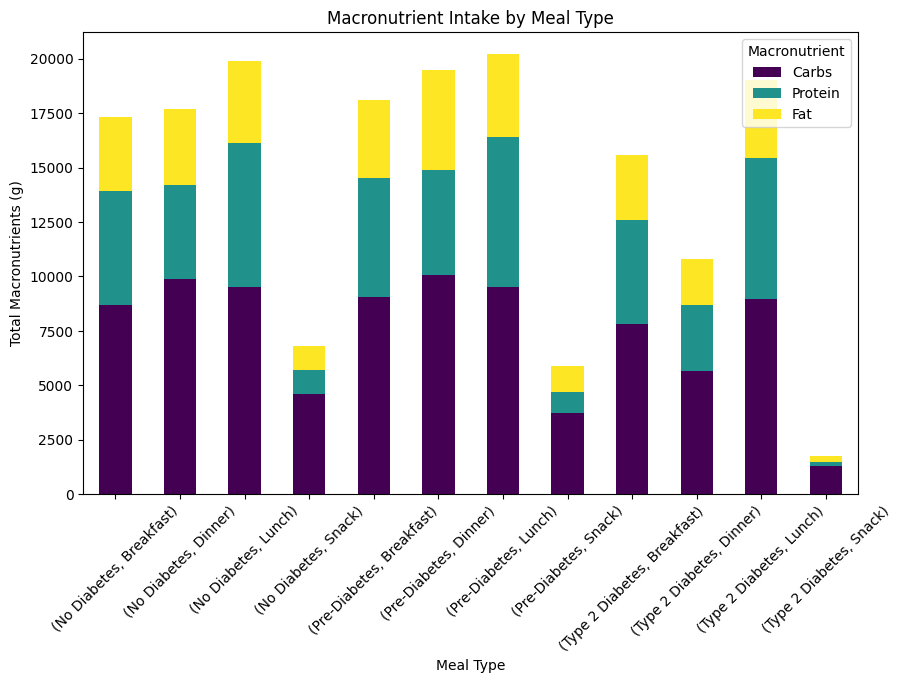

In [13]:
# Remove rows where 'Meal Type' is missing
meal_df = merged_data.dropna(subset=['Meal Type'])

meal_macros = meal_df.groupby(['Diabetes Status', 'Meal Type'])[['Carbs', 'Protein', 'Fat']].sum()

meal_macros.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")
plt.xlabel("Meal Type")
plt.ylabel("Total Macronutrients (g)")
plt.title("Macronutrient Intake by Meal Type")
plt.legend(title="Macronutrient")
plt.xticks(rotation=45)
plt.show()

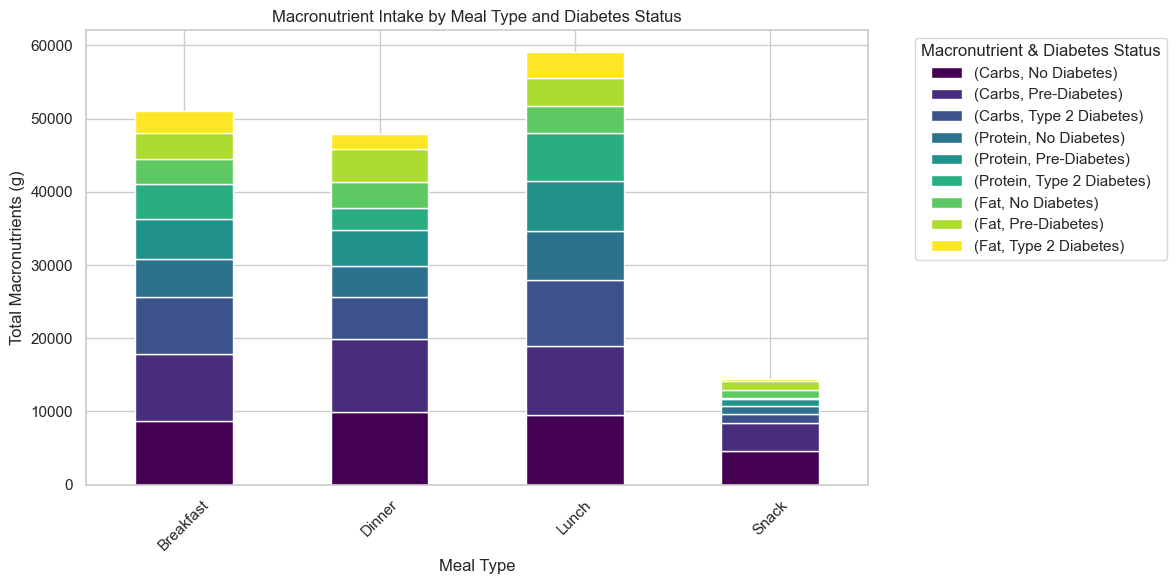

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

meal_df = merged_data.dropna(subset=['Meal Type', 'Diabetes Status'])

meal_macros = meal_df.groupby(['Meal Type', 'Diabetes Status'])[['Carbs', 'Protein', 'Fat']].sum()

meal_macros = meal_macros.unstack(level=1)

colors = {"Carbs": "#1f77b4", "Protein": "#ff7f0e", "Fat": "#2ca02c"}

fig, ax = plt.subplots(figsize=(12, 6))

meal_macros.plot(kind="bar", stacked=True, colormap="viridis", ax=ax)

plt.xlabel("Meal Type")
plt.ylabel("Total Macronutrients (g)")
plt.title("Macronutrient Intake by Meal Type and Diabetes Status")
plt.legend(title="Macronutrient & Diabetes Status", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


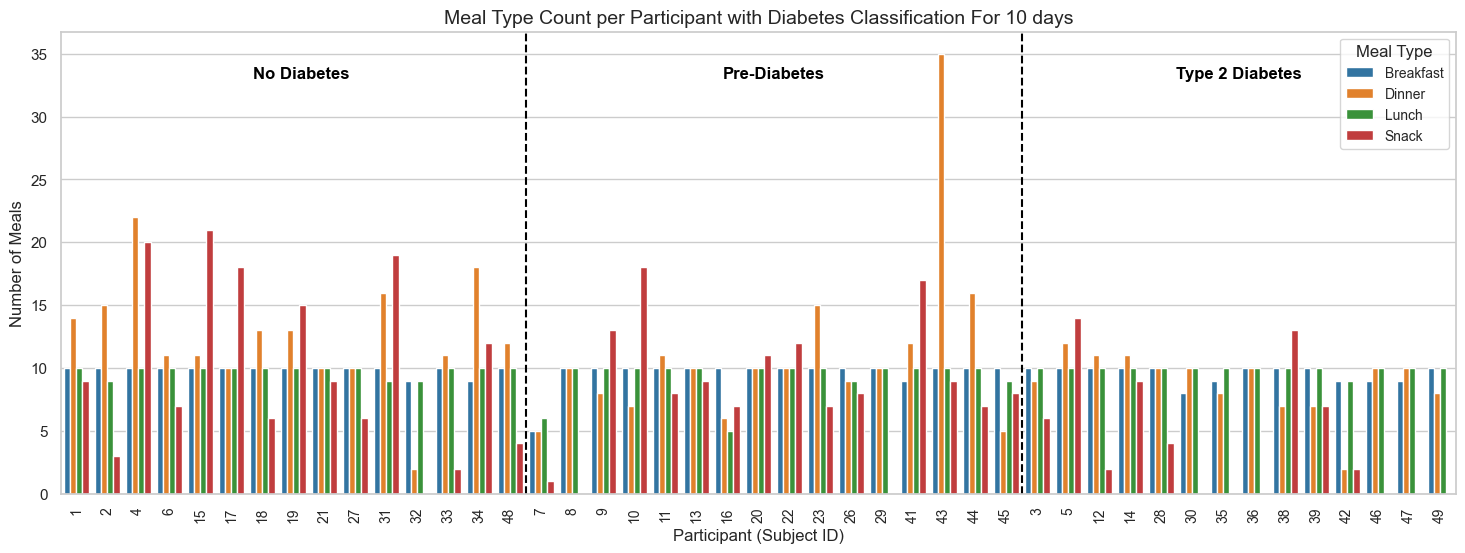

In [23]:
meal_diabetes_df = merged_data.copy()

meal_diabetes_df = meal_diabetes_df.sort_values(by=["Diabetes Status", "subject"])

meal_counts = meal_diabetes_df.groupby(["subject", "Meal Type"]).size().reset_index(name="Count")

subject_diabetes_status = meal_diabetes_df[["subject", "Diabetes Status"]].drop_duplicates()

meal_counts = meal_counts.merge(subject_diabetes_status, on="subject", how="left")

sorted_subjects = meal_counts.sort_values(by=["Diabetes Status", "subject"])["subject"].unique()
meal_counts["subject"] = pd.Categorical(meal_counts["subject"], categories=sorted_subjects, ordered=True)

sns.set(style="whitegrid")
plt.figure(figsize=(18, 6))

sns.barplot(data=meal_counts, x="subject", y="Count", hue="Meal Type", palette="tab10")

diabetes_groups = meal_counts.groupby("Diabetes Status")["subject"].unique()
boundaries = []
last_index = 0
for group in ["No Diabetes", "Pre-Diabetes", "Type 2 Diabetes"]:
    if group in diabetes_groups:
        last_index += len(diabetes_groups[group])
        boundaries.append(last_index - 0.5) 

for boundary in boundaries[:-1]: 
    plt.axvline(x=boundary, color="black", linestyle="--", linewidth=1.5)

midpoints = [0] + boundaries[:-1]  
labels = ["No Diabetes", "Pre-Diabetes", "Type 2 Diabetes"]
for i, label in enumerate(labels):
    if i < len(boundaries):
        x_pos = (midpoints[i] + boundaries[i]) / 2
        plt.text(x_pos, plt.ylim()[1] * 0.9, label, ha="center", fontsize=12, fontweight="bold", color="black")

plt.xticks(rotation=90, fontsize=10)
plt.xlabel("Participant (Subject ID)", fontsize=12)
plt.ylabel("Number of Meals", fontsize=12)
plt.title("Meal Type Count per Participant with Diabetes Classification For 10 days", fontsize=14)
plt.legend(title="Meal Type", fontsize=10)

plt.show()


In [ ]:
import plotly.express as px

scatter_df = merged_data.dropna(subset=['Calories', 'Libre GL', 'Diabetes Status'])

fig = px.scatter(scatter_df, x="Calories", y="Libre GL", 
                 color="Diabetes Status", 
                 title="Calories Burned vs. Glucose Levels",
                 labels={"Calories": "Calories Burned", "Libre GL": "Glucose Level (mg/dL)"},
                 template="plotly")

fig.show()

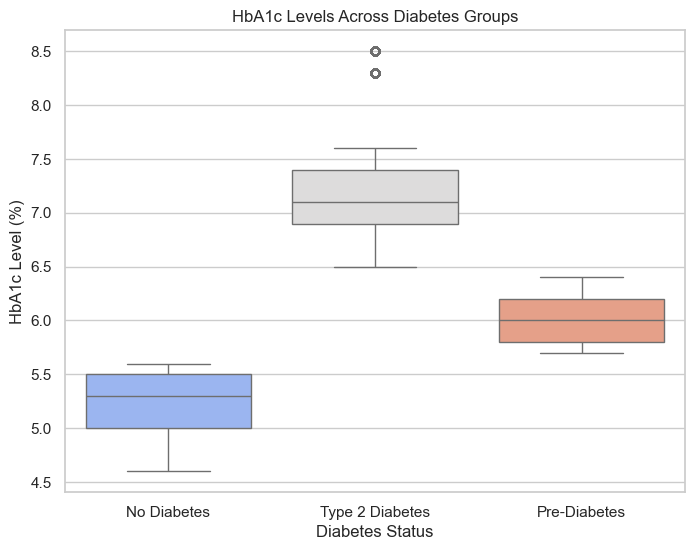

In [37]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(8, 6))
sns.boxplot(data=merged_data, x="Diabetes Status", y="HbA1c", palette="coolwarm")

plt.xlabel("Diabetes Status")
plt.ylabel("HbA1c Level (%)")
plt.title("HbA1c Levels Across Diabetes Groups")
plt.show()

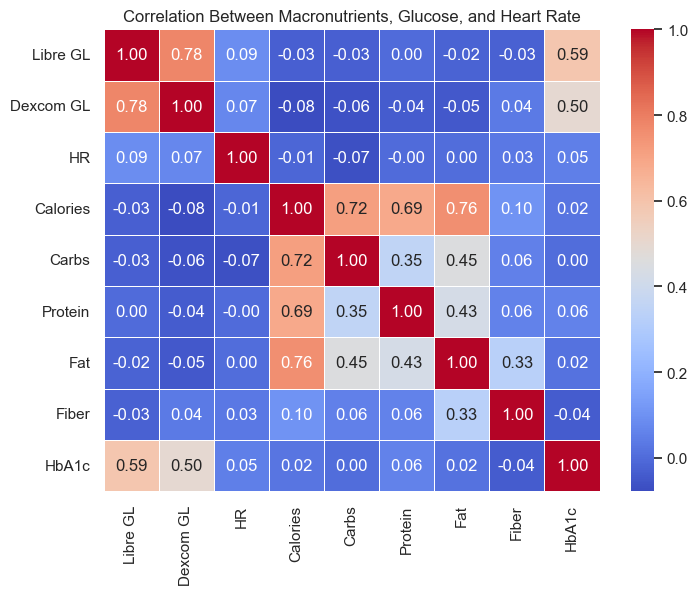

In [39]:
import seaborn as sns

corr_data = merged_data[['Libre GL', 'Dexcom GL', 'HR', 'Calories', 'Carbs', 'Protein', 'Fat', 'Fiber', 'HbA1c']].dropna()

corr_matrix = corr_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Between Macronutrients, Glucose, and Heart Rate")
plt.show()